## Let's have fun looking at data from Chicago Crime Rate 
This is a sample notebook, using Pandas, seaborn, which uses the Crime Rate datasest from chicago city states.
The dataset can be downloaded from https://catalog.data.gov/dataset/crimes-2001-to-present-398a4 but it's pretty big (at least 1.6 GB) - and carries data from 2002 to current

Part of this work is also similiar to 
Fisseha Berhane's work (see https://datascience-enthusiast.com/Python/SparkDataFrames-ExploringChicagoCrimes.html)  - that was using Spark while this notebook uses Pandas

The part on unstack-ing groupby is explained by Simone Centellegher ( see https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html ) 

In [1]:
import pandas as pd

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

df = pd.read_csv('./Crimes_-_2001_to_Present.csv',low_memory=False)

In [2]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.244314e+06,7.244314e+06,7.244267e+06,6.629481e+06,6.630830e+06,7.144486e+06,7.144486e+06,7.244314e+06,7.144486e+06,7.144486e+06
mean,6.610001e+06,1.188403e+03,1.129450e+01,2.271393e+01,3.754891e+01,1.164547e+06,1.885724e+06,2.009072e+03,4.184202e+01,-8.767169e+01
std,3.262363e+06,7.029763e+02,6.945816e+00,1.383230e+01,2.153549e+01,1.712138e+04,3.264562e+04,5.574708e+00,8.983001e-02,6.197427e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.588292e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152947e+06,1.859115e+06,2.004000e+03,4.176879e+01,-8.771379e+01
50%,6.600066e+06,1.111000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166041e+06,1.890652e+06,2.008000e+03,4.185574e+01,-8.766603e+01
75%,9.442094e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176360e+06,1.909224e+06,2.013000e+03,4.190669e+01,-8.762830e+01
max,1.224318e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.020000e+03,4.202291e+01,-8.752453e+01


In [3]:
df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
5,11227503,JB146383,01/01/2015 12:01:00 AM,061XX S KILBOURN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,813,8.0,13.0,65.0,17,NaN,NaN,2015,04/12/2019 04:00:15 PM,NaN,NaN,NaN
6,11227508,JB146365,01/01/2017 12:01:00 AM,027XX S WHIPPLE ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,1033,10.0,12.0,30.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
7,11022695,JA353568,07/17/2017 10:10:00 AM,021XX W MC LEAN AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,1432,14.0,32.0,22.0,06,NaN,NaN,2017,07/24/2017 03:54:23 PM,NaN,NaN,NaN
8,11227633,JB147500,12/28/2017 03:55:00 PM,011XX S MICHIGAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,123,1.0,2.0,32.0,11,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
9,11227586,JB147613,02/10/2017 12:00:00 PM,089XX S COTTAGE GROVE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,633,6.0,8.0,44.0,14,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [4]:
df['Primary Type'].value_counts()

THEFT                                1528335
BATTERY                              1327024
CRIMINAL DAMAGE                       825026
NARCOTICS                             735306
ASSAULT                               458823
OTHER OFFENSE                         449415
BURGLARY                              407464
MOTOR VEHICLE THEFT                   333728
DECEPTIVE PRACTICE                    301523
ROBBERY                               272309
CRIMINAL TRESPASS                     204991
WEAPONS VIOLATION                      85504
PROSTITUTION                           69368
PUBLIC PEACE VIOLATION                 50728
OFFENSE INVOLVING CHILDREN             50222
CRIM SEXUAL ASSAULT                    28043
SEX OFFENSE                            27665
INTERFERENCE WITH PUBLIC OFFICER       17465
GAMBLING                               14594
LIQUOR LAW VIOLATION                   14451
ARSON                                  12131
HOMICIDE                               10785
KIDNAPPING

In [5]:
boolSelection =  df['Primary Type'] == 'DOMESTIC VIOLENCE'

In [6]:
df [boolSelection  ] 

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1548491,1326195,G021609,01/11/2001 02:30:41 AM,087XX S ESCANABA AV,9901,DOMESTIC VIOLENCE,DOMESTIC VIOLENCE,APARTMENT,True,True,423,4.0,NaN,NaN,08B,1196869.0,1847416.0,2001,08/17/2015 03:03:40 PM,41.736176,-87.55432,"(41.73617608, -87.554319607)"


In [7]:
df['Description'].value_counts()

SIMPLE                                                          852166
$500 AND UNDER                                                  589955
DOMESTIC BATTERY SIMPLE                                         563345
TO VEHICLE                                                      400268
TO PROPERTY                                                     381210
OVER $500                                                       375184
POSS: CANNABIS 30GMS OR LESS                                    278174
FORCIBLE ENTRY                                                  274718
AUTOMOBILE                                                      263380
FROM BUILDING                                                   243930
RETAIL THEFT                                                    185532
TELEPHONE THREAT                                                141439
TO LAND                                                         126478
POSS: CRACK                                                     121121
UNLAWF

In [8]:
df['Primary Type'].value_counts().head(10)

THEFT                  1528335
BATTERY                1327024
CRIMINAL DAMAGE         825026
NARCOTICS               735306
ASSAULT                 458823
OTHER OFFENSE           449415
BURGLARY                407464
MOTOR VEHICLE THEFT     333728
DECEPTIVE PRACTICE      301523
ROBBERY                 272309
Name: Primary Type, dtype: int64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

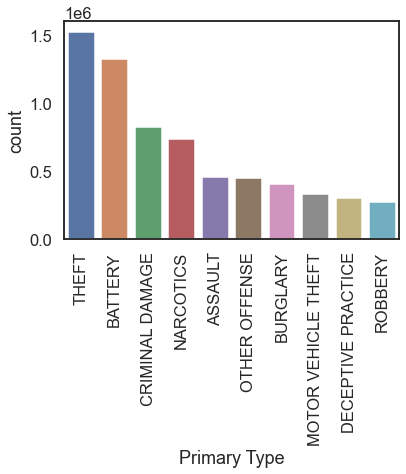

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")

ax = sns.countplot(data=df, x='Primary Type', order=df['Primary Type'].value_counts().head(10).index)
plt.setp(ax.get_xticklabels(), rotation=90)

We see now the primary types are dominated by **theft**, **battery**,**crimmnal charges** etc


In [10]:
df['Primary Type'].value_counts().sort_values(ascending=False)

THEFT                                1528335
BATTERY                              1327024
CRIMINAL DAMAGE                       825026
NARCOTICS                             735306
ASSAULT                               458823
OTHER OFFENSE                         449415
BURGLARY                              407464
MOTOR VEHICLE THEFT                   333728
DECEPTIVE PRACTICE                    301523
ROBBERY                               272309
CRIMINAL TRESPASS                     204991
WEAPONS VIOLATION                      85504
PROSTITUTION                           69368
PUBLIC PEACE VIOLATION                 50728
OFFENSE INVOLVING CHILDREN             50222
CRIM SEXUAL ASSAULT                    28043
SEX OFFENSE                            27665
INTERFERENCE WITH PUBLIC OFFICER       17465
GAMBLING                               14594
LIQUOR LAW VIOLATION                   14451
ARSON                                  12131
HOMICIDE                               10785
KIDNAPPING

In [11]:
df['Primary Type'].value_counts(ascending=False)[:10]

THEFT                  1528335
BATTERY                1327024
CRIMINAL DAMAGE         825026
NARCOTICS               735306
ASSAULT                 458823
OTHER OFFENSE           449415
BURGLARY                407464
MOTOR VEHICLE THEFT     333728
DECEPTIVE PRACTICE      301523
ROBBERY                 272309
Name: Primary Type, dtype: int64

In [12]:
df.groupby('Year')['Date'].count()

Year
2001    485784
2002    486764
2003    475961
2004    469398
2005    453741
2006    448140
2007    437046
2008    427106
2009    392775
2010    370406
2011    351881
2012    336151
2013    307311
2014    275570
2015    264464
2016    269481
2017    268696
2018    268255
2019    260463
2020    194921
Name: Date, dtype: int64

Text(0.5, 1.0, 'Committed Crimes By Year')

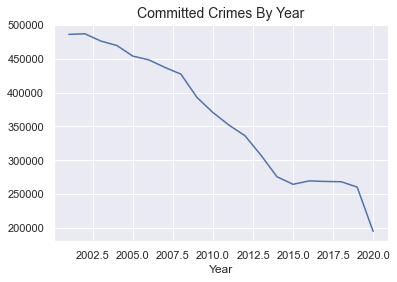

In [67]:
import seaborn as sns
sns.set_theme(style="darkgrid")

df.groupby('Year')['Date'].count().plot(kind='line')
plt.title("Committed Crimes By Year", fontsize = 14)

## we see now that there is a decrease in crime rate from 2002 to 2020

## Let's take a look at Homicides only

In [14]:
df.where(df["Primary Type"] == "HOMICIDE").count()

ID                      10785
Case Number             10785
Date                    10785
Block                   10785
IUCR                    10785
Primary Type            10785
Description             10785
Location Description    10785
Arrest                  10785
Domestic                10785
Beat                    10785
District                10785
Ward                    10401
Community Area          10401
FBI Code                10785
X Coordinate            10782
Y Coordinate            10782
Year                    10785
Updated On              10785
Latitude                10782
Longitude               10782
Location                10782
dtype: int64

In [17]:
boolSelection_homicides =  df['Primary Type'] == 'HOMICIDE'
df [boolSelection_homicides]['Description'].value_counts() 

FIRST DEGREE MURDER         10729
RECKLESS HOMICIDE              52
INVOLUNTARY MANSLAUGHTER        4
Name: Description, dtype: int64

[None, None, None, None, None, None]

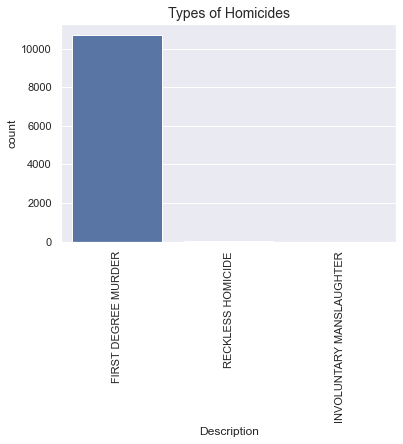

In [63]:
boolSelection_homicides =  df['Primary Type'] == 'HOMICIDE'
df [boolSelection_homicides  ]['Description'].value_counts() 

onlyHomicides = df [boolSelection_homicides  ] 
#ax = sns.countplot(data=df, x='Primary Type', order=df [boolSelection_homicides]['Description'].value_counts().head(10).index)

plt.title("Types of Homicides", fontsize = 14)
ax = sns.countplot(x="Description", data=df, order=df [boolSelection_homicides]['Description'].value_counts().head(10).index)
plt.setp(ax.get_xticklabels(), rotation=90)

### It is interesting to note that a disappriopriate number of them are classified as 'First degree Murder'

## Find the number of crimes per month and see if there's anything perculiar

In [20]:
df.dtypes

df['DateTime'] = pd.to_datetime(df['Date'],  format='%m/%d/%Y %I:%M:%S %p' )


ID                               int64
Case Number                     object
Date                            object
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
DateTime                datetime64[ns]
dtype: object

In [21]:
df['month'] = pd.DatetimeIndex(df['DateTime']).month

In [23]:
df.dtypes
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,DateTime,month
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN,2001-01-01 11:00:00,1
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-10-08 03:00:00,10
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-03-28 14:00:00,3
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-09-09 20:17:00,9
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-08-26 10:00:00,8


In [24]:
df.groupby('month')['Date'].count()

month
1     568502
2     500661
3     594747
4     593174
5     644525
6     641610
7     675179
8     669010
9     626101
10    633008
11    569654
12    528143
Name: Date, dtype: int64

Text(0.5, 1.0, 'Number of Crimes Per Month')

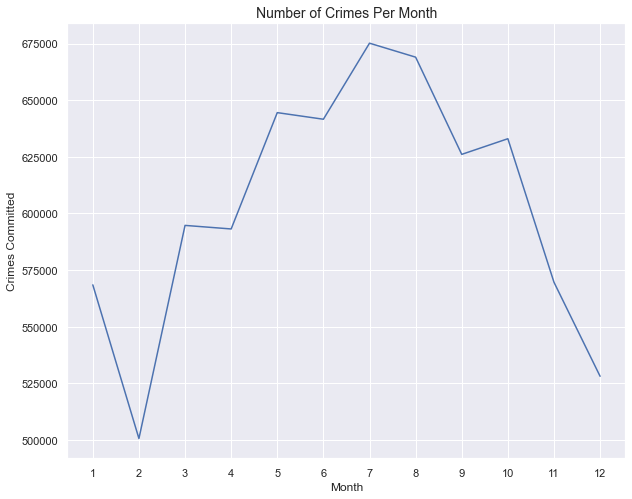

In [25]:
#do a group by Month and show it in a graph 
#sns.lineplot(data=df.groupby('month')['Date'].count(), x="month")
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
#df.groupby(by=['month'])['Date'].count().plot(kind="bar")

plt.figure(figsize=(10, 8))

#fig = df.groupby(by=['month'])['Date'].count().plot(kind="bar")
fig = df.groupby('month')['Date'].count().plot(kind='line') 

#print ( fig ) 
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Month")
plt.setp(fig.get_xticklabels(), rotation=0)
plt.ylabel("Crimes Committed")
plt.title("Number of Crimes Per Month", fontsize = 14)

Here, we see that most the crimes seem to take place on July

In [26]:
crime_location_locations = df [boolSelection_homicides].groupby('Location Description')['ID'].count()

In [27]:
crime_location_locations.sort_values(ascending=False)

Location Description
STREET                       5326
AUTO                         1237
APARTMENT                     920
ALLEY                         681
HOUSE                         566
PORCH                         326
YARD                          243
PARKING LOT                   187
PARK PROPERTY                 119
VACANT LOT                    114
HALLWAY                        90
RETAIL STORE                   81
GANGWAY                        68
GARAGE                         58
GAS STATION                    57
GAS STATION DRIVE/PROP.        51
RESTAURANT                     50
CHA PARKING LOT                49
CHA GROUNDS                    44
CHA HALLWAY                    36
TAVERN                         34
BASEMENT                       31
ABANDONED BUILDING             30
CHA APARTMENT                  28
HOTEL                          23
VESTIBULE                      21
STAIRWELL                      21
DRIVEWAY                       17
CLUB                       

In [28]:
top10domestic_locations = crime_location_locations.sort_values(ascending=False).nlargest(10)

In [29]:
top10domestic_locations

Location Description
STREET           5326
AUTO             1237
APARTMENT         920
ALLEY             681
HOUSE             566
PORCH             326
YARD              243
PARKING LOT       187
PARK PROPERTY     119
VACANT LOT        114
Name: ID, dtype: int64

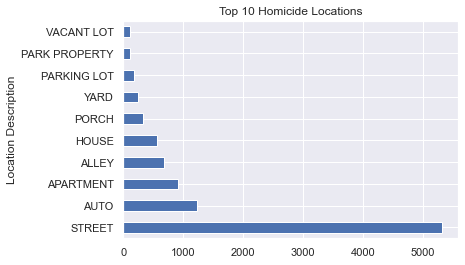

In [32]:
ax = top10domestic_locations.plot.barh(rot=0, title="Top 10 Homicide Locations")

In [33]:
#we derive the dayofWeek from Datetime columns
df['DayOfWeek'] = df['DateTime'].dt.day_name()

In [ ]:
df.columns

In [34]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,DateTime,month,DayOfWeek
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN,2001-01-01 11:00:00,1,Monday
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-10-08 03:00:00,10,Sunday
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-03-28 14:00:00,3,Tuesday
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-09-09 20:17:00,9,Saturday
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-08-26 10:00:00,8,Saturday


In [35]:
crime_domestic_byWeek = df [boolSelection_homicides].groupby('DayOfWeek')['ID'].count()


In [36]:
crime_domestic_byWeek

DayOfWeek
Friday       1434
Monday       1458
Saturday     1869
Sunday       1929
Thursday     1401
Tuesday      1359
Wednesday    1335
Name: ID, dtype: int64

In [37]:
crime_domestic_byWeek.sort_values(ascending=False)

DayOfWeek
Sunday       1929
Saturday     1869
Monday       1458
Friday       1434
Thursday     1401
Tuesday      1359
Wednesday    1335
Name: ID, dtype: int64

Text(0.5, 1.0, 'Number of Homicides By Day Of Week')

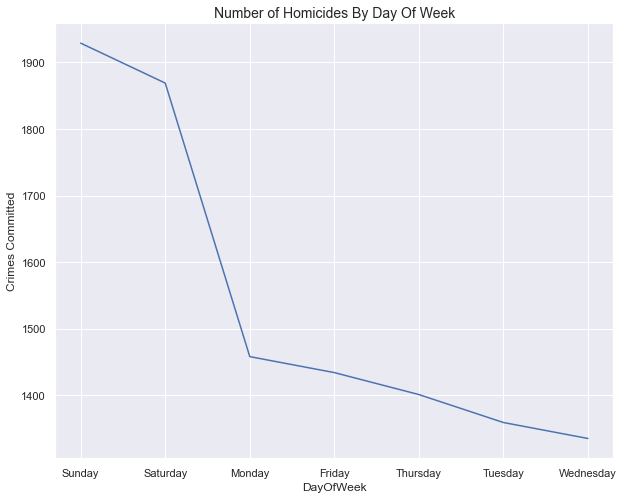

In [38]:
plt.figure(figsize=(10, 8))

#fig = df.groupby(by=['month'])['Date'].count().plot(kind="bar")
#columns = [ 'Sunday' ,'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday' , 'Saturday'  ] 
#fig =crime_domestic_byWeek.plot(kind='line') 

#print ( fig ) 
#plt.xticks(columns)
#plt.xlabel("Month")
#plt.setp(fig.get_xticklabels(), rotation=0)
plt.ylabel("Crimes Committed")
fig =crime_domestic_byWeek.sort_values(ascending=False).plot(kind='line') 
plt.title("Number of Homicides By Day Of Week", fontsize = 14)

### we can see that most Domestic [Homicide] crimes took place on sundays, followed by Saturday, and the most popular location seems to be the street

### Domestic Crimes By Hour

In [39]:
#df['HourOfDay'] = df['DateTime'].dt.day_name()
df['HourOfDay'] = df['DateTime'].dt.hour

In [40]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,DateTime,month,DayOfWeek,HourOfDay
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN,2001-01-01 11:00:00,1,Monday,11
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-10-08 03:00:00,10,Sunday,3
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-03-28 14:00:00,3,Tuesday,14
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-09-09 20:17:00,9,Saturday,20
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,2017-08-26 10:00:00,8,Saturday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244309,11700926,JC279725,05/26/2019 05:13:00 PM,036XX W DOUGLAS BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,1011,10.0,24.0,29.0,26,1152126.0,1893208.0,2019,06/30/2019 03:56:27 PM,41.862830,-87.717040,"(41.862830429, -87.717040084)",2019-05-26 17:13:00,5,Sunday,17
7244310,24560,JC279072,05/26/2019 06:48:00 AM,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,1233,12.0,25.0,28.0,01A,1167752.0,1893853.0,2019,06/20/2020 03:48:45 PM,41.864278,-87.659660,"(41.864278228, -87.659660218)",2019-05-26 06:48:00,5,Sunday,6
7244311,11707734,JC287730,07/01/2014 07:30:00 AM,063XX S NORMAL BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,722,7.0,20.0,68.0,11,NaN,NaN,2014,06/02/2019 04:09:42 PM,NaN,NaN,NaN,2014-07-01 07:30:00,7,Tuesday,7
7244312,11707239,JC287563,11/30/2017 09:00:00 AM,022XX S KOSTNER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1013,10.0,22.0,29.0,11,NaN,NaN,2017,06/02/2019 04:09:42 PM,NaN,NaN,NaN,2017-11-30 09:00:00,11,Thursday,9


In [41]:
#f.groupby('HourOfDay')

crime_domestic_byHour = df [boolSelection_homicides].groupby('HourOfDay')['ID'].count()

In [42]:
crime_domestic_byHour

HourOfDay
0     720
1     693
2     651
3     526
4     433
5     352
6     303
7     223
8     225
9     288
10    259
11    293
12    345
13    344
14    390
15    389
16    459
17    464
18    508
19    467
20    562
21    608
22    611
23    672
Name: ID, dtype: int64

Text(0.5, 1.0, 'Domestic Homicides Committed By Hour ')

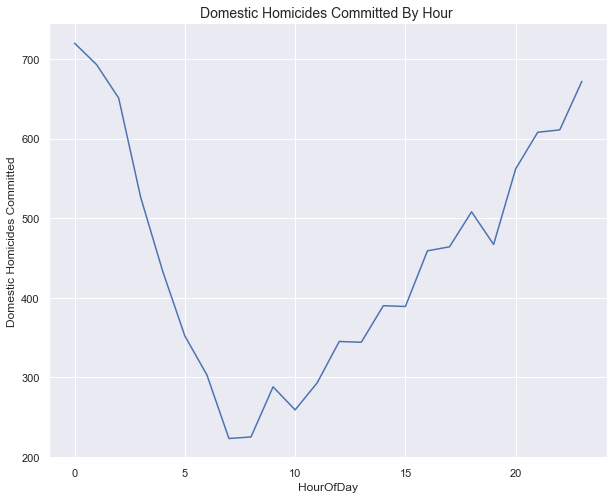

In [43]:

plt.figure(figsize=(10, 8))

plt.ylabel("Domestic Homicides Committed")
fig =crime_domestic_byHour.plot(kind='line') 
plt.title("Domestic Homicides Committed By Hour ", fontsize = 14)

It appears that most of these occur in the nighttime, the peak seem to be 12 23-midnight

In [54]:
hourlyCount  = df [boolSelection_homicides].groupby(["HourOfDay", "DayOfWeek"])['ID'].count()

In [55]:
hourlyCount

HourOfDay  DayOfWeek
0          Friday        84
           Monday        97
           Saturday     134
           Sunday       126
           Thursday     109
           Tuesday       90
           Wednesday     80
1          Friday        91
           Monday        66
           Saturday     151
           Sunday       164
           Thursday      75
           Tuesday       75
           Wednesday     71
2          Friday        79
           Monday        83
           Saturday     144
           Sunday       160
           Thursday      67
           Tuesday       59
           Wednesday     59
3          Friday        47
           Monday        50
           Saturday     130
           Sunday       150
           Thursday      54
           Tuesday       51
           Wednesday     44
4          Friday        37
           Monday        44
           Saturday     114
           Sunday       104
           Thursday      46
           Tuesday       49
           Wednesday     39

In [56]:
hourlyCount.unstack()

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HourOfDay,,,,,,,
0,84,97,134,126,109,90,80
1,91,66,151,164,75,75,71
2,79,83,144,160,67,59,59
3,47,50,130,150,54,51,44
4,37,44,114,104,46,49,39
5,36,41,75,101,40,32,27
6,38,29,58,76,26,45,31
7,25,33,42,53,31,19,20
8,26,26,37,43,29,31,33


<AxesSubplot:xlabel='HourOfDay', ylabel='Domestic Homicides Committed'>

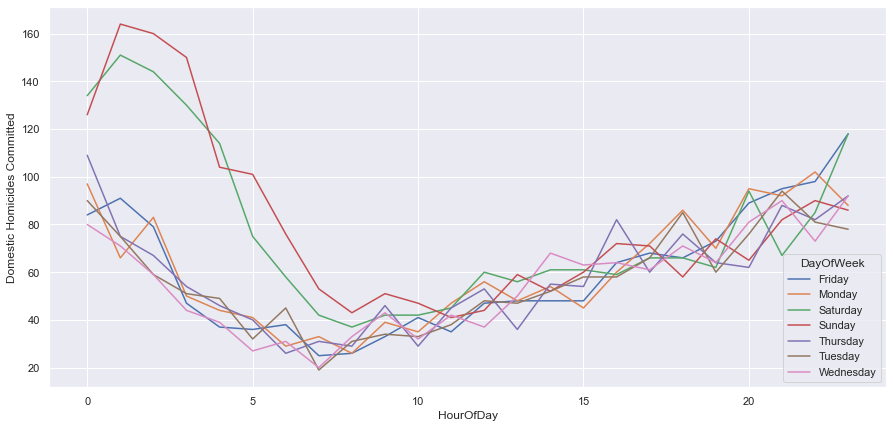

In [59]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
plt.ylabel("Domestic Homicides Committed")
hourlyCount.unstack().plot(ax=ax)

### Summary of Homicides
So it appears that the homicides mostly look place on **Sat, Sun - after 0000hrs - 0500hrs**. 
The common locations seems to be **(1) Street (2) Auto (3) Department** 
We are not sure why this is so, however, this can be a good info to plan for police reinforcement work


### Let's take a look at the trend of all crimes by Day , Hour

In [57]:
hourlyCount_overall  = df.groupby(["HourOfDay", "DayOfWeek"])['ID'].count()

In [58]:
hourlyCount_overall

HourOfDay  DayOfWeek
0          Friday       55688
           Monday       56455
           Saturday     64316
           Sunday       63870
           Thursday     53310
           Tuesday      53290
           Wednesday    53487
1          Friday       29712
           Monday       28386
           Saturday     44606
           Sunday       46387
           Thursday     27451
           Tuesday      26416
           Wednesday    26503
2          Friday       24228
           Monday       22452
           Saturday     40338
           Sunday       42437
           Thursday     22009
           Tuesday      20542
           Wednesday    20745
3          Friday       18961
           Monday       17462
           Saturday     32709
           Sunday       37599
           Thursday     17259
           Tuesday      15774
           Wednesday    15936
4          Friday       14329
           Monday       13535
           Saturday     24174
           Sunday       27981
           Thursday

In [60]:
hourlyCount_overall.unstack()

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HourOfDay,,,,,,,
0,55688,56455,64316,63870,53310,53290,53487
1,29712,28386,44606,46387,27451,26416,26503
2,24228,22452,40338,42437,22009,20542,20745
3,18961,17462,32709,37599,17259,15774,15936
4,14329,13535,24174,27981,13062,12329,12198
5,12928,12561,16877,19657,11995,11907,11923
6,17005,16534,15297,15493,16899,16759,16958
7,25890,25644,17682,15764,26213,26892,26594
8,38738,38920,26070,22047,39764,39562,40026


<AxesSubplot:xlabel='HourOfDay', ylabel='Overall Crimes Committed'>

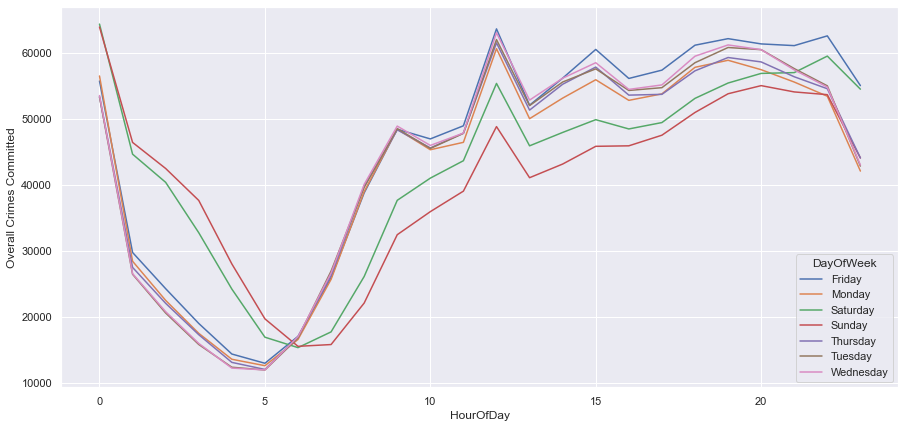

In [62]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
plt.ylabel("Overall Crimes Committed")
hourlyCount_overall.unstack().plot(ax=ax)

### Summary For Overall Crimes 
Observation shows that the trends are largely the same for all days of the weeks. Overall, July seem to be a peak period.
During the day, there seems to be 2 peaks - (1) around noon (2) around 0000hrs

The trend is largely similiar to Homicide, the noticeable difference is Sat/Sun seems to be standout for homicides (compared to other days). 

The caution here is that we do not really know the causes for this difference, and I am not a domain expert in police work/crime department either. However, we do see the same pattern for overall crimes (across days of weeks), and so the planning for shiftwork in officers can take into consideration the 2 peak periods.


